In [13]:

facebook_aspect_ratio = 1.91
twitter_aspect_ratio = 16/9
%run ../../load_magic/storage.py
s = Storage()
color_dict = s.load_object('states_abbreviation_color_dict')
def plot_lived_density(qe_column='Population_Density', qr_column='Later_Count',
                       xlabel='Lived population density', ylabel='No. of deaths 10 days after hitting 5 deaths', aspect_ratio=1.91):
    columns_list = [qe_column, qr_column]
    df = density_df[columns_list].dropna(axis='index', how='any')
    x = df[qe_column]
    y = df[qr_column]
    facet_grid = sns.lmplot(x=qe_column, y=qr_column, data=df, scatter=True, scatter_kws={'s': 1.0, 'color': 'grey'})
    set_list = facet_grid.set(xlabel=xlabel, ylabel=ylabel,
                              title='Rate of spread vs Lived population density')
    fig_width = 18
    fig_height = fig_width/aspect_ratio
    set_list = facet_grid.fig.set(figheight=fig_height, figwidth=fig_width)
    
    # Get r squared value
    pearsonr_tuple = pearsonr(df[qe_column], df[qr_column])
    pearson_r = pearsonr_tuple[0]
    pearsonr_statement = str('%.2f' % pearson_r)
    coefficient_of_determination_statement = str('%.2f' % pearson_r**2)
    p_value = pearsonr_tuple[1]
    if p_value < 0.0001:
        pvalue_statement = '<0.0001'
    else:
        pvalue_statement = '=' + str('%.4f' % p_value)
    s_str = r'$r^2=' + coefficient_of_determination_statement + ',\ p' + pvalue_statement + '$'
    set_list = facet_grid.fig.text(0.75, 0.9, s_str, alpha=0.5, fontsize='x-large')

    label_point(df[qe_column], df[qr_column], df.index.to_series(), plt.gca())
    
    ax = facet_grid.ax
    ax.set_alpha = 0.1
    left, right = ax.get_xlim()
    left -= 0.125
    right += 0.125
    xlim_tuple = (left, right)
    xlim_tuple = ax.set_xlim(xlim_tuple)
    
    return facet_grid.fig

In [8]:

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        state_abbreviation = point.val
        x = point.x
        y = point.y
        kwargs = dict(textcoords='offset points', ha='left', va='bottom', fontsize='small',
                      bbox=dict(boxstyle='round,pad=0.5', fc=color_dict[state_abbreviation], alpha=0.5),
                      arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        if state_abbreviation == 'NC':
            annotation = plt.annotate('{}'.format(state_abbreviation), xy=(x, y), xytext=(25, 40), **kwargs)
        elif state_abbreviation == 'OH':
            annotation = plt.annotate('{}'.format(state_abbreviation), xy=(x, y), xytext=(25, 40), **kwargs)
        elif state_abbreviation == 'GA':
            annotation = plt.annotate('{}'.format(state_abbreviation), xy=(x, y), xytext=(-25, 50), **kwargs)
        elif state_abbreviation == 'IN':
            annotation = plt.annotate('{}'.format(state_abbreviation), xy=(x, y), xytext=(-25, 50), **kwargs)
        else:
            annotation = plt.annotate('{}'.format(state_abbreviation), xy=(x, y), xytext=(-5, -8), **kwargs)

Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\pgf\rate_of_spread_vs_lived_density.pgf
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\png\rate_of_spread_vs_lived_density.png
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\svg\rate_of_spread_vs_lived_density.svg


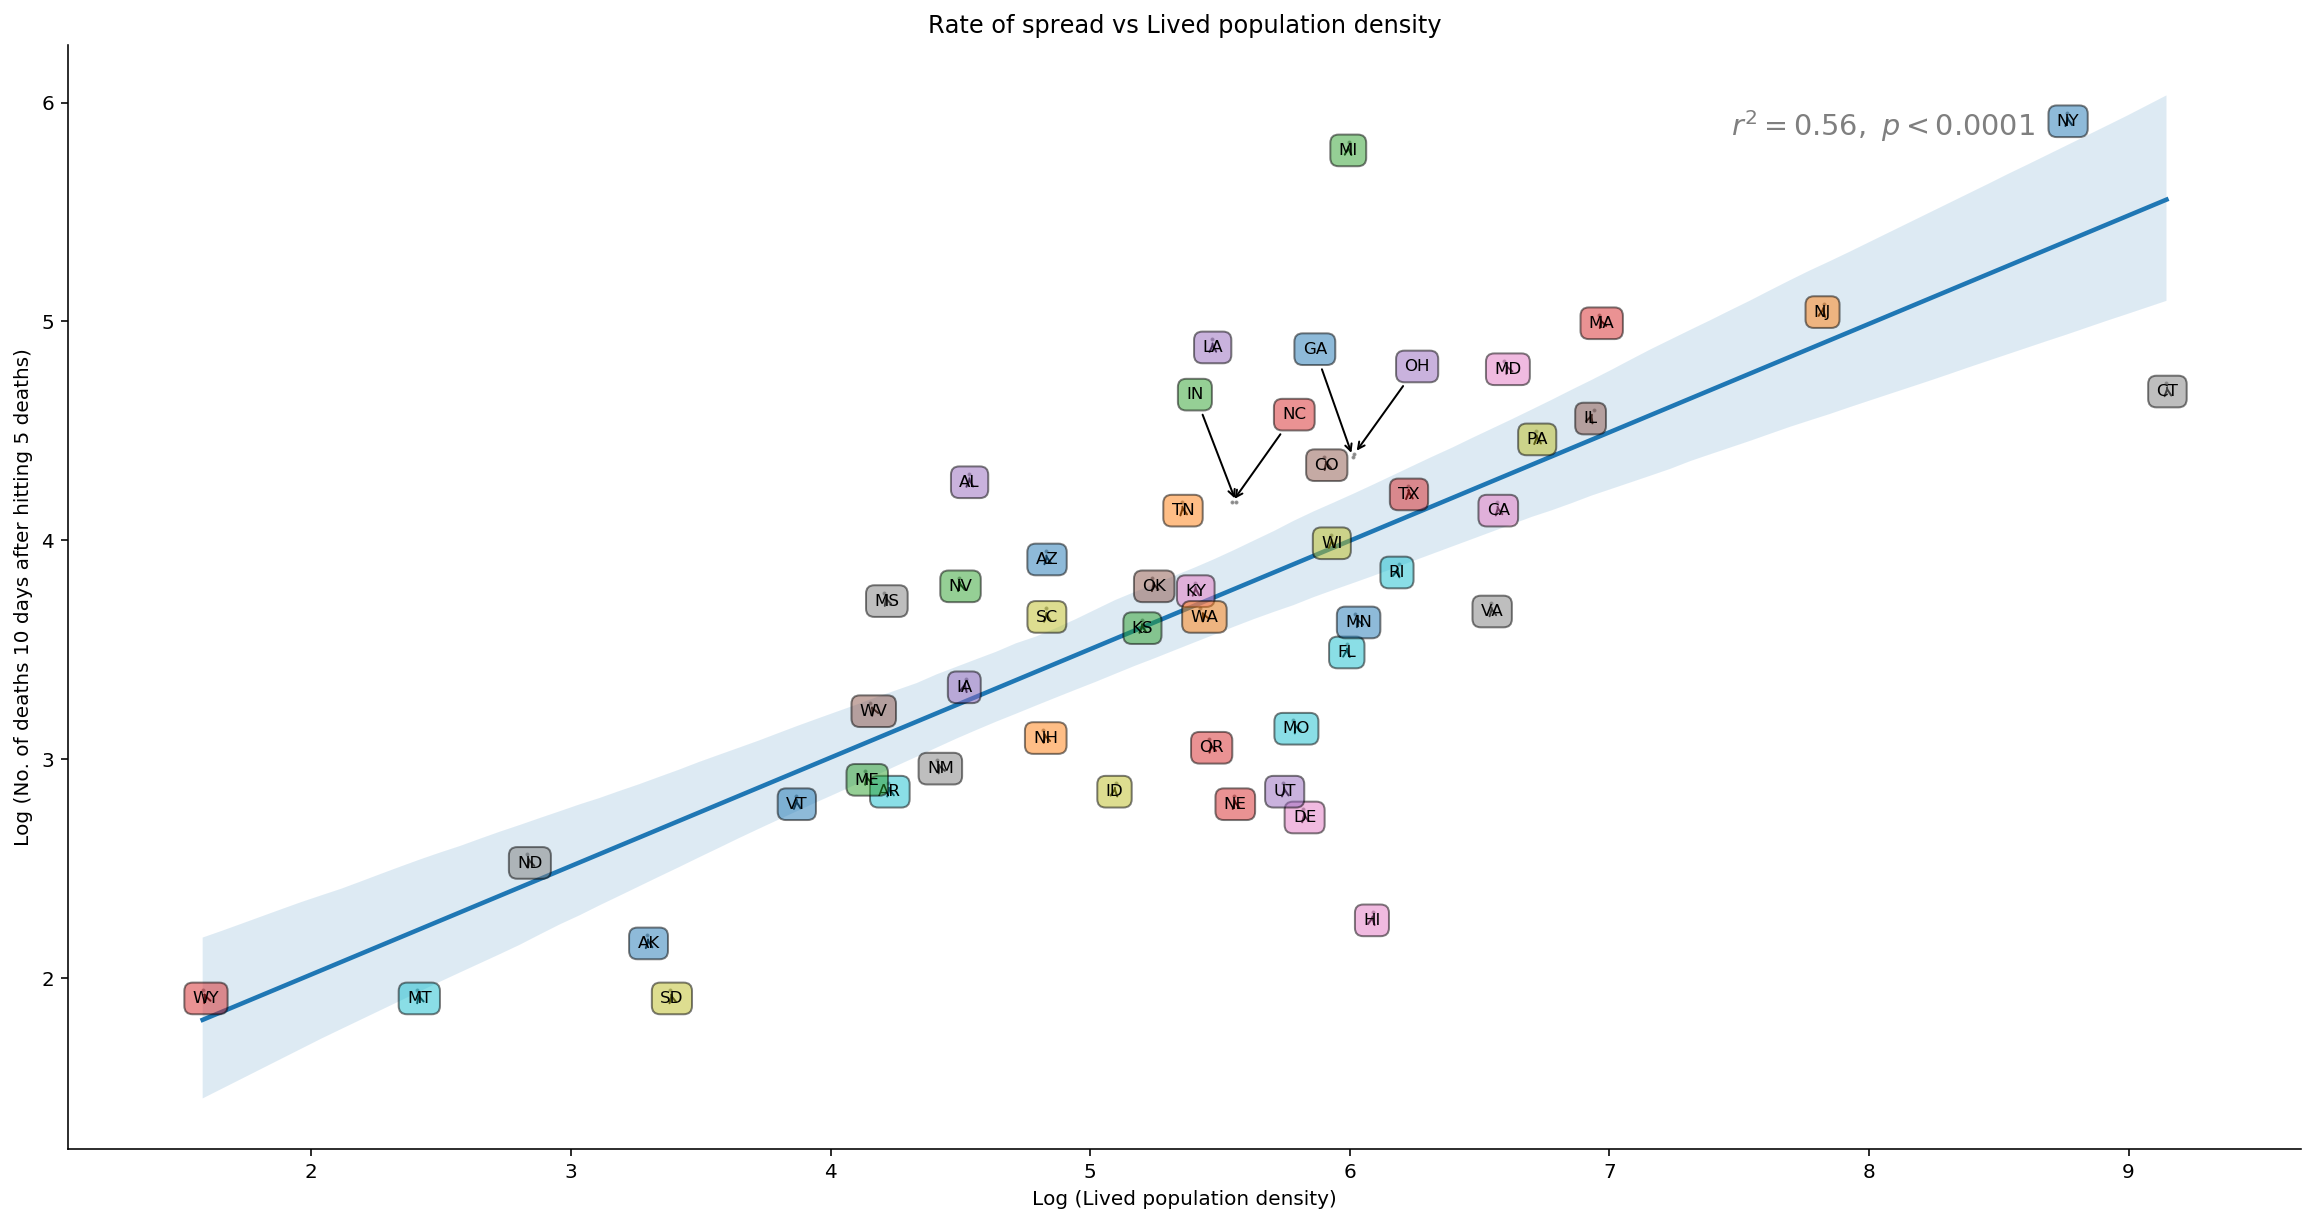

In [15]:

import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

density_df = s.load_object('density_df')
fig = plot_lived_density(qe_column='Log_Weighted_Density', qr_column='Log_Later_Count',
                         xlabel='Log (Lived population density)', ylabel='Log (No. of deaths 10 days after hitting 5 deaths)',
                         aspect_ratio=18/9)
%run ../../load_magic/charts.py
save_fig_as_various(fig, 'rate_of_spread_vs_lived_density', verbose=True)